# Metereologia (2021) - Collected Data Analysis
This is a jupyternotebook intended to read, understand and validate the data from the file "meteo_202109-202112.csv".

> **Goals**:
>
> - Create a data frame;
> - Create simpler labels;
> - Validate values.


##### We'll use "pandas" to read the **CSV** file and create a data frame from it.

In [1]:
import pandas as pd

metereologia_2021 = pd.read_csv ("meteo_202109-202112.csv") #Use the portuguese encoding.

##### Now we want to inspect the features labels:

In [2]:
metereologia_2021.columns

Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')

##### The labels are for now ok to work with.
##### Now it's needed to check for the overall content of each feature.

In [3]:
metereologia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   sea_level            0 non-null      float64
 9   grnd_level           0 non-null      float64
 10  humidity             2928 non-null   int64  
 11  wind_speed           2928 non-null   float64
 12  rain_1h              537 non-null    float64
 13  clouds_all           2928 non-null   int64  
 14  weather_description  2928 non-null   object 
dtypes: float64(8), int64(4), object(3)
mem

#### This approach showed us something that make us relutant about the content of the values on the features *No.8*: "sea_level", *No.9*: "grnd_level", and *No.12*: "rain_1h".  

In [4]:
metereologia_2021.head()

,dt,dt_iso,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,1630454400,2021-09-01 00:00:00 +0000 UTC,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00 +0000 UTC,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00 +0000 UTC,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00 +0000 UTC,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00 +0000 UTC,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


The 3 features are linked to **float's** data type.\
No doubt it's a missing values case.

<Axes: >

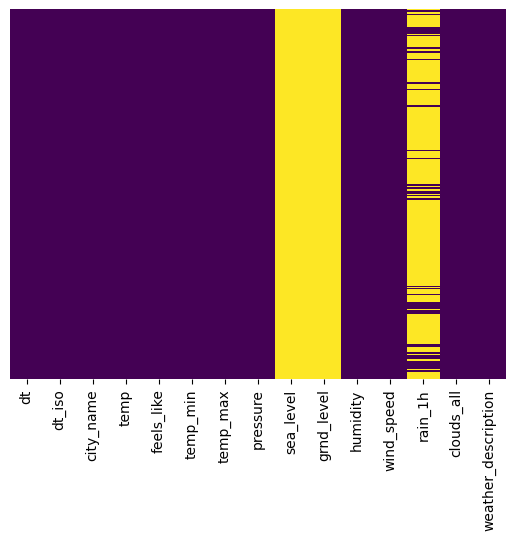

In [5]:
import seaborn as sns

sns.heatmap (metereologia_2021.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### No doubt it's a drop feature case.

In [6]:
metereologia_2021.drop ('sea_level', axis=1, inplace=True)
metereologia_2021.drop ('grnd_level', axis=1, inplace=True)
metereologia_2021.drop ('rain_1h', axis=1, inplace=True)

#### We check the data frame once more:

In [7]:
metereologia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   humidity             2928 non-null   int64  
 9   wind_speed           2928 non-null   float64
 10  clouds_all           2928 non-null   int64  
 11  weather_description  2928 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 274.6+ KB


We'll now proceed to inspect feature **No. 11**: "weather_description".\
As a qualitative measure, it is a categorical feature that we want to know more details about.\
We'll check all the categories in it.

In [8]:
metereologia_2021['weather_description'].value_counts()

weather_description
sky is clear            795
overcast clouds         667
light rain              412
broken clouds           402
scattered clouds        324
few clouds              203
moderate rain           110
heavy intensity rain     15
Name: count, dtype: int64

#### We conclude that we know nothing about the relation between those categories and the problem in ends.
#### We'll keep it as it is for now.

In [9]:
metereologia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   city_name            2928 non-null   object 
 3   temp                 2928 non-null   float64
 4   feels_like           2928 non-null   float64
 5   temp_min             2928 non-null   float64
 6   temp_max             2928 non-null   float64
 7   pressure             2928 non-null   int64  
 8   humidity             2928 non-null   int64  
 9   wind_speed           2928 non-null   float64
 10  clouds_all           2928 non-null   int64  
 11  weather_description  2928 non-null   object 
dtypes: float64(5), int64(4), object(3)
memory usage: 274.6+ KB


We'll now proceed to inspect feature **No. 2**: "city_name".

In [10]:
metereologia_2021['city_name'].value_counts()

city_name
local    2928
Name: count, dtype: int64

We'll drop it.

In [11]:
metereologia_2021.drop('city_name', axis=1, inplace=True)
metereologia_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   2928 non-null   int64  
 1   dt_iso               2928 non-null   object 
 2   temp                 2928 non-null   float64
 3   feels_like           2928 non-null   float64
 4   temp_min             2928 non-null   float64
 5   temp_max             2928 non-null   float64
 6   pressure             2928 non-null   int64  
 7   humidity             2928 non-null   int64  
 8   wind_speed           2928 non-null   float64
 9   clouds_all           2928 non-null   int64  
 10  weather_description  2928 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 251.8+ KB


#### Date as iso it will prevail from now.
#### Further needed work will be put in practice when we decide what to engeneer with that feature.

### Conclusion

#### Since we have work to do with this dataset further on, we'll export the clean & ready-to-go dataframe to a csv.

In [13]:
metereologia_2021.to_csv("metereologia_2021.csv")